## Importing needed Libraries

As our first objective, before getting started with the real task, we import all neccessary libraries & functions that will be essential to successfully execute this project. by doing so, we also prepare the environment to be ready to handle all requests throughout this activity.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

## Data Ingestion

we now import our dataset upon which we shall base our entire project.

In [ ]:
dataset = pd.read_csv('marketing_campaign.csv',sep = '\t')
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the info above , we get insights of the various attributes, their data types and also the idea of missing data from each individual attribute. As we can see the attribute "Income" has lesser number of rows as compared to other attributes, indicating potential missing data. so in our next step we shall be getting rid of such incomplete rows.

In [ ]:
dataset = dataset.dropna()
dataset.shape

(2216, 29)

## Data Pre-Processing & Feature Selection

#### Data Transformation & aggregartion

The raw data available posses no business value. It needs to be transformed & aggregrated to make it suitable to derieve buisiness insights. Under this section we will be applying transformations to some of the columns and also adding/removing columns to make the dataset more neat & meaningful.

In [ ]:
def isLeap(year):
  Leap = None
  if year % 400==0:
    Leap = True
  elif year % 100 == 0:
    Leap = False
  elif year % 4 == 0:
    Leap = True
  else:
    Leap = False
  return Leap


def get_LastVisit(date):
  Months = [31,28,31,30,31,30,31,31,30,31,30,31]
  today = [1,1,2023]
  d,m,y = list(map(int,date.split('-')))
  Months[1] = 29 if isLeap(y) else 28
  d1 = Months[m-1]-d + (today[0]-1)
  d2 = sum(Months[m:])+sum(Months[:today[0]-1])
  d3 = sum([366 if isLeap(y) else 365 for y in range(y+1,today[2])])
  diff = d1+d2+d3
  return diff

def getAgeGroup(age):
  ageGroup = ''
  if age <= 18:
    ageGroup = 'Teenager'
  elif age >18 and age<= 30:
    ageGroup = 'Bachelors'
  elif age >30 and age<=50:
    ageGroup  = 'Adults'
  elif age >50 and age<=70:
    ageGroup = 'Seniors'
  elif age>=70 and age<100:
    ageGroup = 'Retired'
  else:
    ageGroup = 'Expired'
  return ageGroup

def AcceptOffer(responses):
  Accepted = 0
  if 1 in responses:
    Accepted = 1

  return Accepted

In [ ]:
dataset['Age'] = dataset.apply(lambda row: 2023- int(row.Year_Birth), axis=1)
dataset['FirstVisit'] = dataset.apply(lambda row : get_LastVisit(row.Dt_Customer),axis=1)
dataset['AgeGroup'] = dataset.apply(lambda row: getAgeGroup(row.Age), axis = 1)
dataset.rename(columns = {'Response': 'AcceptedCmpN'}, inplace = True)
dataset["OfferAccepted"] = dataset.apply(lambda row : AcceptOffer([row.AcceptedCmp1,row.AcceptedCmp2,row.AcceptedCmp3,row.AcceptedCmp4,row.AcceptedCmp5,row.AcceptedCmpN]), axis = 1)

Now that we have our data transformed & aggregrated , lets get rid of the columns that are of no use in our project. For example columns such as primary keys / redundant columns are needed to be get rid of.

In [ ]:
dataset = dataset[['Age', 'AgeGroup','Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'FirstVisit', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', "OfferAccepted", 'Complain']]
dataset

,Age,AgeGroup,Education,Marital_Status,Income,Kidhome,Teenhome,FirstVisit,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,OfferAccepted,Complain
0,66,Seniors,Graduation,Single,58138.0,0,0,3770,58,635,...,172,88,88,3,8,10,4,7,1,0
1,69,Seniors,Graduation,Single,46344.0,1,1,3220,38,11,...,2,1,6,2,1,1,2,5,0,0
2,58,Seniors,Graduation,Together,71613.0,0,0,3419,26,426,...,111,21,42,1,8,2,10,4,0,0
3,39,Adults,Graduation,Together,26646.0,1,0,3246,26,11,...,10,3,5,2,2,0,4,6,0,0
4,42,Adults,PhD,Married,58293.0,1,0,3268,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,Seniors,Graduation,Married,61223.0,0,1,3488,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,77,Retired,PhD,Together,64014.0,2,1,3126,56,406,...,0,0,8,7,8,2,5,7,1,0
2237,42,Adults,Graduation,Divorced,56981.0,0,0,3262,91,908,...,32,12,24,1,2,3,13,6,1,0
2238,67,Seniors,Master,Together,69245.0,0,1,3263,8,428,...,80,30,61,2,6,5,10,3,0,0


## Exploratory Data Analysis

#### Count Analysis of Categorical attributes in our dataset

Now that we have our dataset clean , it now has meaning. In business , this dataset is considered as Gold data. Lets now get started to explore for correlations , distributions or spread of the variables throughout the sample space.

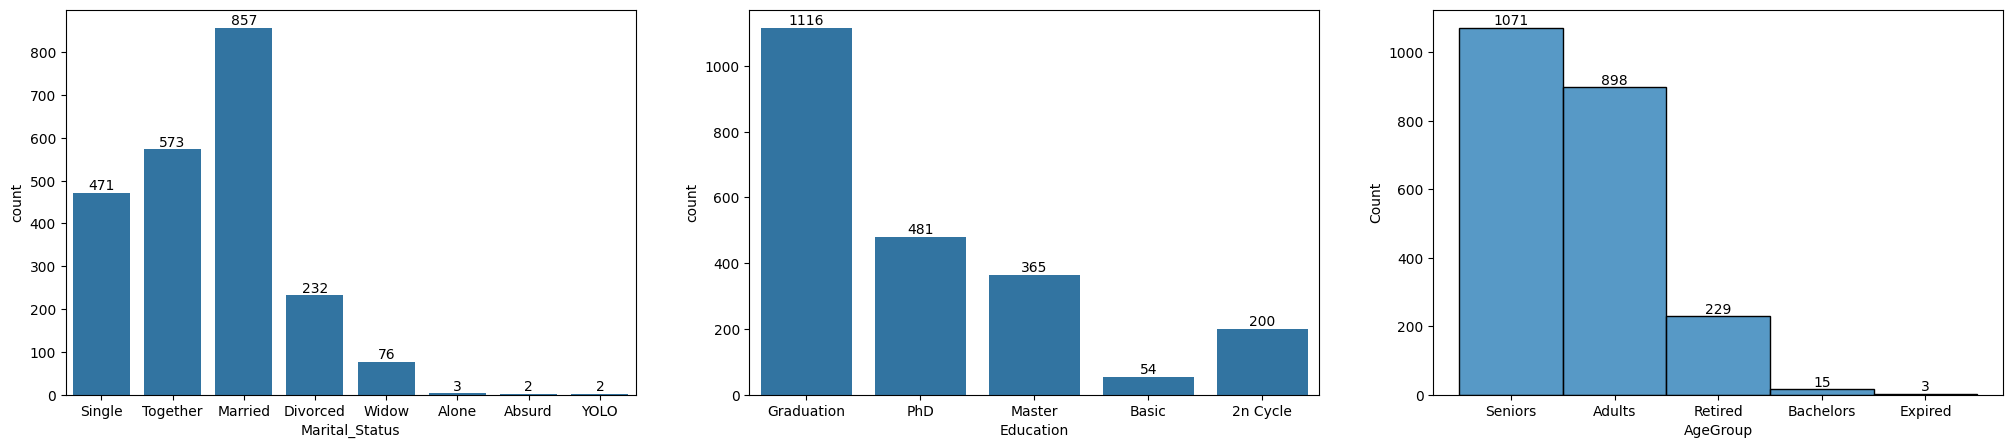

In [ ]:
 # assign required values
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

# illustrate count plots
ax1 = sns.countplot(x=dataset['Marital_Status'], ax=axes[0])
for i in ax1.containers:
  ax1.bar_label(i)
ax2 = sns.countplot(x=dataset['Education'], ax=axes[1])
for i in ax2.containers:
  ax2.bar_label(i)
ax3 = sns.histplot(x=dataset['AgeGroup'],ax = axes[2])
for i in ax3.containers:
  ax3.bar_label(i)
plt.show()

In the plots above we get the count distribution within our categorical variables: Marital_Status, Education & Age Group.
Inferences:
1. within our dataset, the count of Married individuals is highest, followed by Together & Singles.
2. within our dataset, the count of Graduated individuals is highest, followed by PHD & Masters.
3. within our dataset, the count of Senior individuals is highest, followed by Adults & Retired.

## Distribution Analysis of Customer Income accross different Categorical groups

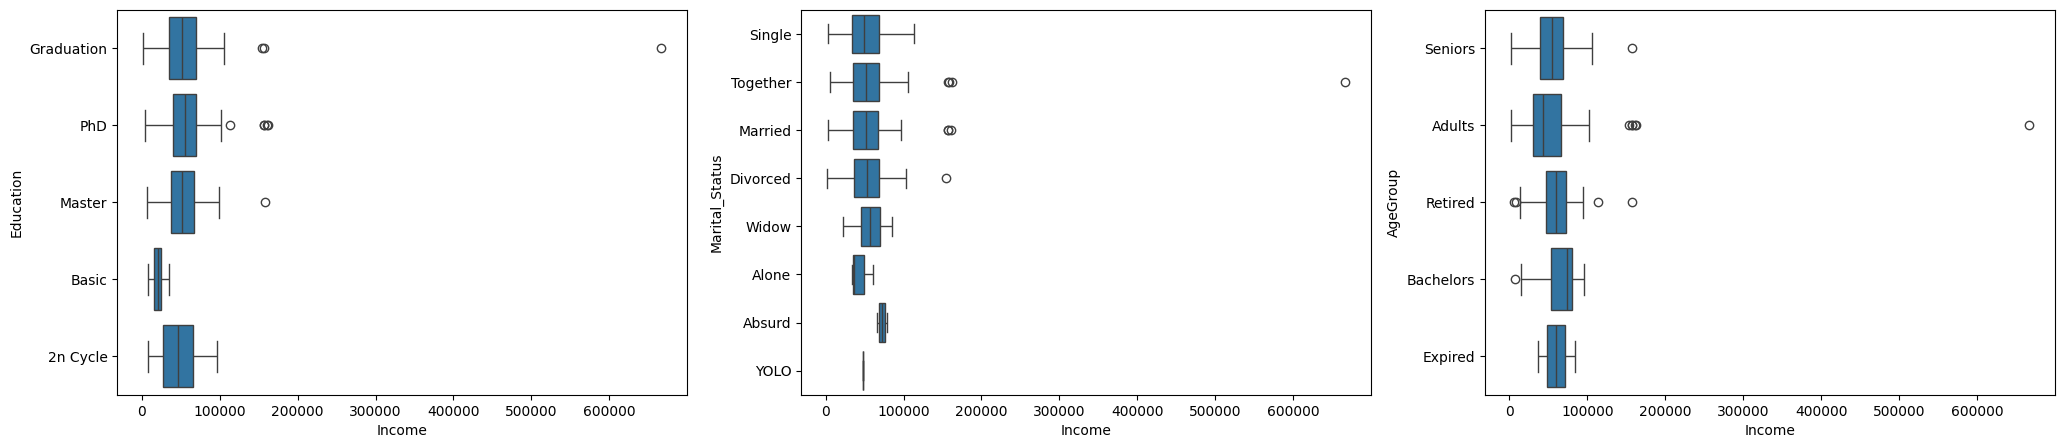

In [ ]:
import seaborn as sns

# assign required values
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5))

ax4 = sns.boxplot(data=dataset,x="Income",y="Education",ax = axes[0])
ax5 = sns.boxplot(data=dataset,x="Income",y="Marital_Status",ax = axes[1])
ax6 = sns.boxplot(data=dataset,x="Income",y="AgeGroup",ax = axes[2])
plt.show()

In the plot we aim to study the distribution of income, across 3 categorical variables.
Inferences obtained:
1. we have an average income of 10K accross all education statuses, Graduated holding the highest outlier with approx 65K.
2. we have an average income of 10K accross all Marital statuses, Together holding the highest outlier with approx 70K.
3. we have an average income of 10K accross all age groups, Adults holding the highest outlier with approx 65K.

## Aggregrated Purchase pattern analysis accross different categorical groups

In [43]:
aggregrated_data = dataset.groupby(['AgeGroup','Education','Marital_Status']).agg({'Income': 'mean' ,
                                                                                   'MntWines': 'mean', 'MntFruits': 'mean',
                                                                                   'MntMeatProducts': 'mean', 'MntFishProducts': 'mean',
                                                                                   'MntSweetProducts': 'mean', 'MntGoldProds': 'mean',
                                                                                   'NumDealsPurchases': 'mean', 'NumWebPurchases': 'mean',
                                                                                   'NumCatalogPurchases': 'mean', 'NumStorePurchases': 'mean',
                                                                                   'NumWebVisitsMonth': 'mean'})
aggregrated_data = aggregrated_data.reset_index()

aggregrated_data

,AgeGroup,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Adults,0,2,33933.875000,178.125000,6.625000,31.750000,11.625000,5.250000,17.625000,1.750000,1.625000,0.625000,4.000000,6.750000
1,Adults,0,3,38466.956522,104.347826,14.804348,62.347826,21.956522,14.739130,27.652174,2.326087,3.021739,1.130435,4.586957,6.326087
2,Adults,0,4,48971.086957,181.956522,26.086957,140.043478,39.695652,24.391304,45.739130,1.826087,3.478261,2.000000,4.826087,5.695652
3,Adults,0,5,39591.916667,157.472222,25.250000,108.638889,70.777778,40.888889,40.444444,2.416667,3.611111,2.083333,4.805556,5.916667
4,Adults,0,6,47682.000000,162.000000,61.000000,83.000000,97.000000,57.000000,61.000000,4.000000,4.000000,3.000000,8.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Seniors,4,2,56175.064516,462.870968,26.225806,145.387097,32.870968,11.935484,41.258065,2.935484,4.645161,3.000000,6.129032,5.193548
78,Seniors,4,3,56613.696970,416.707071,20.595960,157.565657,26.282828,19.575758,28.434343,2.909091,4.747475,3.070707,6.737374,5.454545
79,Seniors,4,4,52430.468085,359.936170,17.638298,153.297872,25.574468,16.042553,31.042553,2.404255,4.063830,2.851064,5.638298,5.106383
80,Seniors,4,5,53735.589286,402.892857,13.125000,148.535714,19.321429,12.250000,27.232143,2.196429,4.000000,2.625000,5.607143,5.750000


In the table above we have an aggregrated data displaying the average statistics accross our categorical variables. The table above can be utilized to understand more in depth about the characteristics of the categorical variables and also study the correlation existing within them.

## Corelation analysis of Income across Product segments

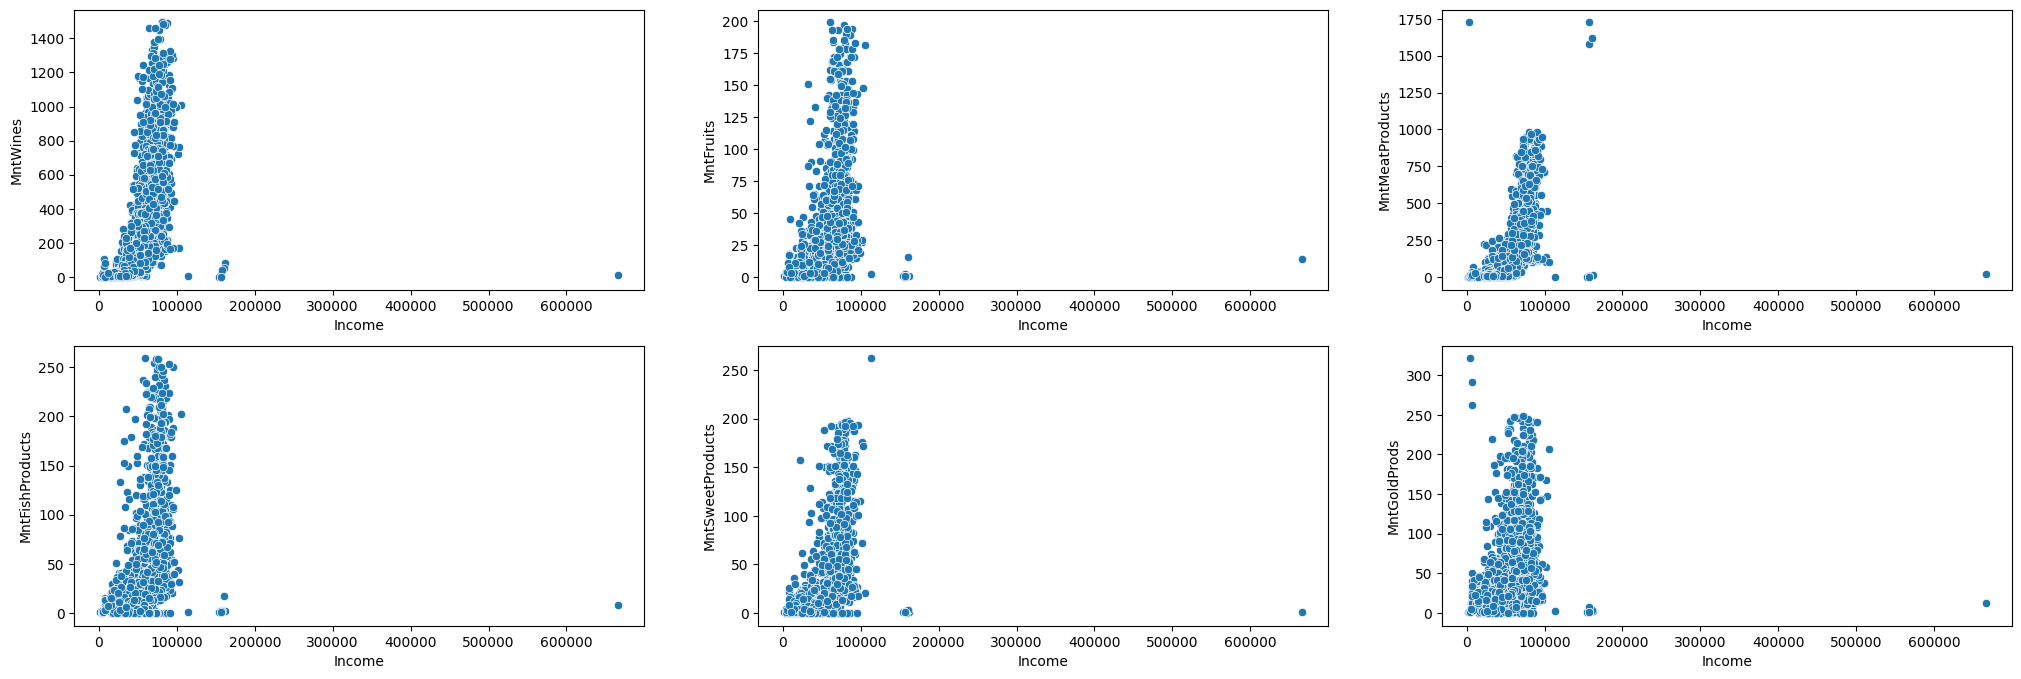

In [ ]:
v2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
fig, axes = plt.subplots(nrows=2 , ncols = 3 , figsize = (25,8))
c=0
for i in range(2):
  for j in range(len(v2)//2):
    sns.scatterplot(dataset, x = 'Income', y = v2[c], ax = axes[i,j])
    c+=1
plt.show()

The plots above aim to illustrate the correlation of Income accross the different product categories.

## Corelation analysis of Income Across Market segments

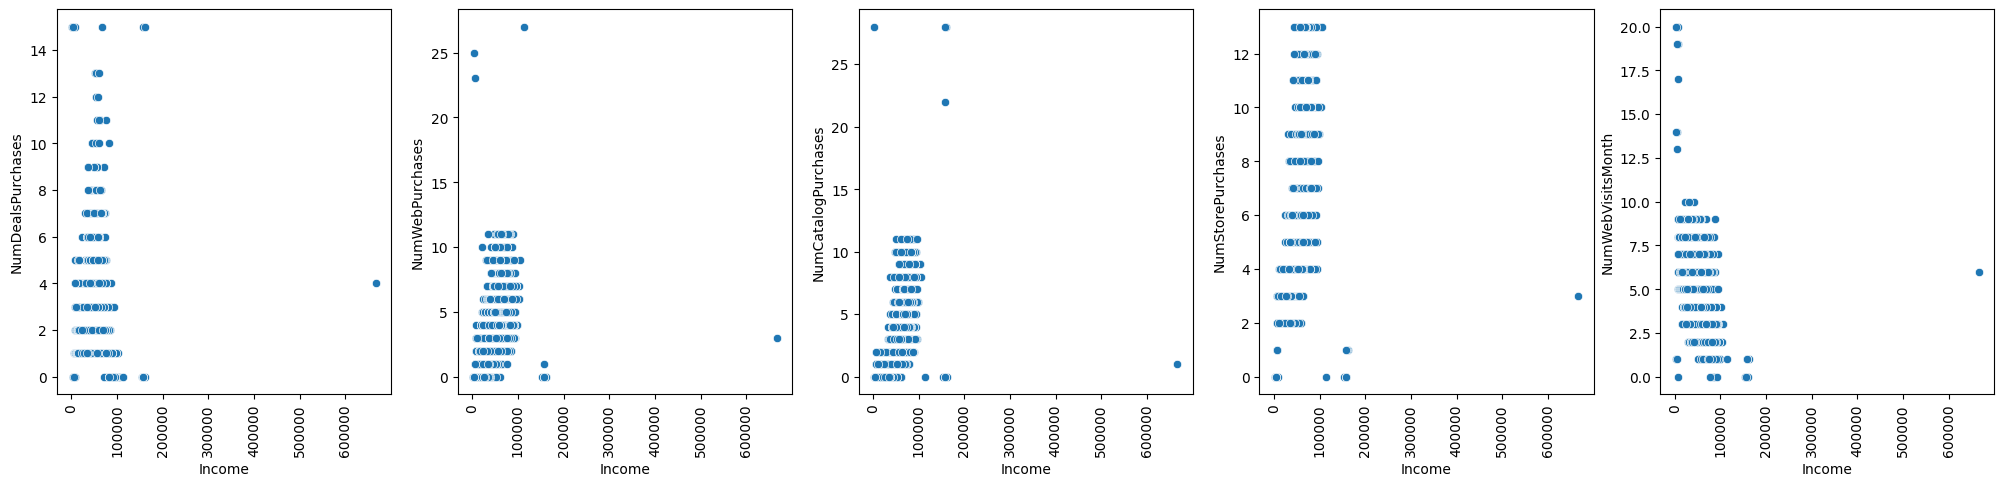

In [ ]:
v2 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
fig, axes = plt.subplots(nrows= 1, ncols = 5 , figsize = (25,5))

for i in range(len(v2)):
    axes[i]= sns.scatterplot(dataset, x = 'Income', y = v2[i], ax = axes[i])
    axes[i].tick_params(axis = 'x', labelrotation = 90)
plt.show()

The plots above aim to illustrate the correlation of Income accross the different Market categories.

## Model development & predictive analysis

Under this section, now we shall be focusing on model development. These models are objects that analyse patterns hidden uderlying within our datasets and can be utilised to perform predictive ,clustering or regression analysis. As a matter of of fact we will be looking into all 3 types of model development and thier usage within this project. But first there are some data engineering & pre processing ensential to make them suitable to be fit in a model.

#### Encoding Categorical **attributes**

In [ ]:
encoder1 = LabelEncoder()
dataset['Education'] = encoder1.fit_transform(dataset['Education'])
encoder2 = LabelEncoder()
dataset['Marital_Status'] = encoder2.fit_transform(dataset['Marital_Status'])

dataset

,Age,AgeGroup,Education,Marital_Status,Income,Kidhome,Teenhome,FirstVisit,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,OfferAccepted,Complain
0,66,Seniors,2,4,58138.0,0,0,3770,58,635,...,172,88,88,3,8,10,4,7,1,0
1,69,Seniors,2,4,46344.0,1,1,3220,38,11,...,2,1,6,2,1,1,2,5,0,0
2,58,Seniors,2,5,71613.0,0,0,3419,26,426,...,111,21,42,1,8,2,10,4,0,0
3,39,Adults,2,5,26646.0,1,0,3246,26,11,...,10,3,5,2,2,0,4,6,0,0
4,42,Adults,4,3,58293.0,1,0,3268,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,Seniors,2,3,61223.0,0,1,3488,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,77,Retired,4,5,64014.0,2,1,3126,56,406,...,0,0,8,7,8,2,5,7,1,0
2237,42,Adults,2,2,56981.0,0,0,3262,91,908,...,32,12,24,1,2,3,13,6,1,0
2238,67,Seniors,3,5,69245.0,0,1,3263,8,428,...,80,30,61,2,6,5,10,3,0,0


#### Feature Selection & Data cleaning

In [ ]:
final_dataset = dataset[['Age','Education', 'Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'OfferAccepted']]
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Marital_Status       2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

#### Pearson's Corelation Analysis

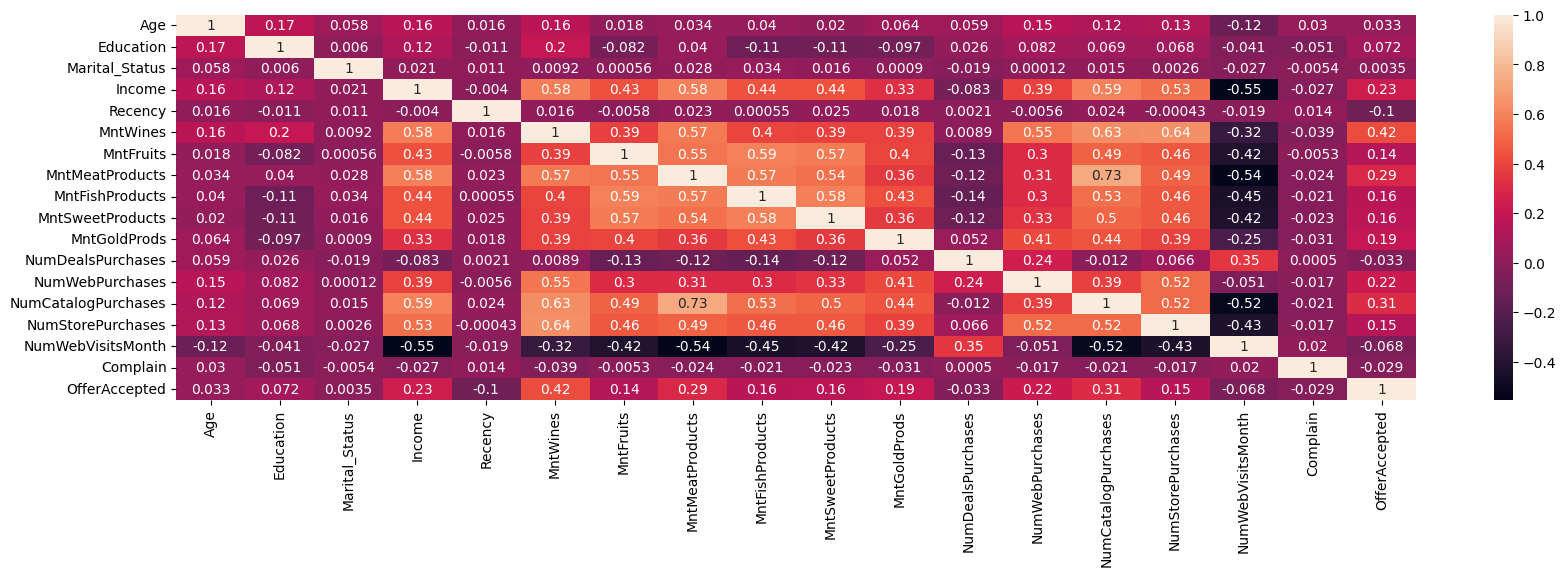

In [ ]:
plt.figure(figsize=(20,5))
cor = final_dataset.corr()
sns.heatmap(cor, annot= True)
plt.show()

In the heatmap above , we aim to study the correlation between different variables using pearson correlation analysis.

#### Principal Component Analysis of the data attributes

In [ ]:
data = final_dataset.iloc[:,:].values
pca = PCA()
pca_data = pca.fit_transform(data)
for variance in pca.explained_variance_ratio_:
  print(round(variance,5), end= ' ')

0.99981 0.00013 4e-05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

The above list demonstrates the Percent of information retained in each matrix , after the principal component decomposition. By using this we can detect & remove unwanted noise from our dataset.

### Predictive analysis using classification modelling

In [ ]:
X= final_dataset.iloc[: , :-1].values
Y = final_dataset.iloc[: , -1].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [ ]:
scores = []
degrees = [int (i) for i in range(2,11)]
for i in degrees:
  model = SVC(kernel = 'poly' ,degree =i, random_state = 0)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  model_accuracy = accuracy_score(y_test,y_pred)
  scores.append(model_accuracy*100)

<function matplotlib.pyplot.show(close=None, block=None)>

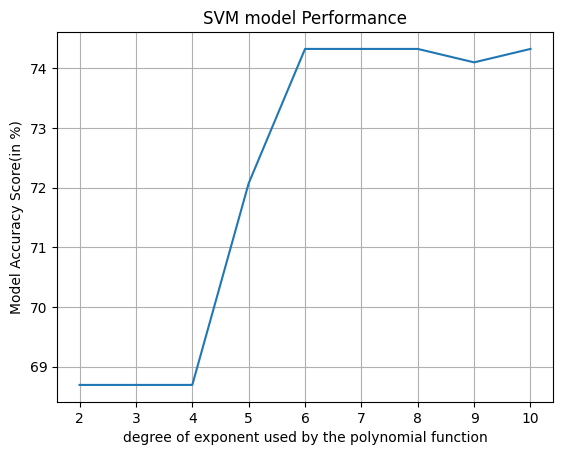

In [ ]:
plt.plot(degrees,scores)
plt.xlabel('degree of exponent used by the polynomial function')
plt.ylabel('Model Accuracy Score(in %)')
plt.title('SVM model Performance')
plt.grid()
plt.show

In the above illustration we get a glimpse of model optimization via tuning of hyperparameters vs its performance. we can see Support Vector model could give a maximum of 74% accuracy. Lets now experiment using a ensemble learning model.

In [ ]:
scores = []
degrees = [int (5*i) for i in range(1,26)]
for i in degrees:
  model = RandomForestClassifier(n_estimators = i,random_state = 32)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  model_accuracy = accuracy_score(y_test,y_pred)
  scores.append(model_accuracy*100)

<function matplotlib.pyplot.show(close=None, block=None)>

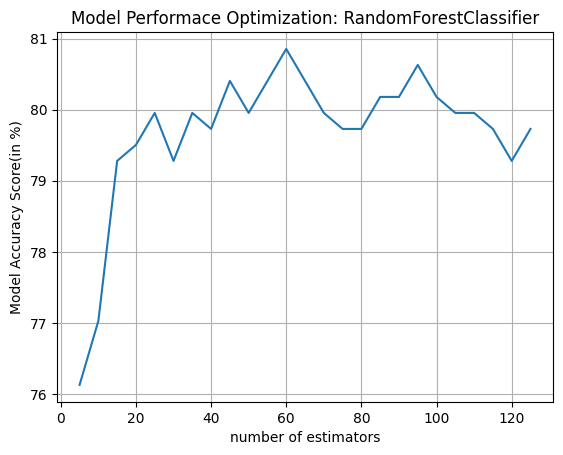

In [ ]:
plt.plot(degrees,scores)
plt.xlabel('number of estimators')
plt.ylabel('Model Accuracy Score(in %)')
plt.title('Model Performace Optimization: RandomForestClassifier')
plt.grid()
plt.show

In the illustration above we could see model optimization via tuning of hyperparameters and parallely studing its performance. we can see our RandomForest model could give an accuracy above 80% using n_estimators = 60. so we finailize RandomForestModel using n_estimators = 60 within this project our perfect model for the task.

In [ ]:
best_predictive_model = RandomForestClassifier(n_estimators = 60, random_state =32)
best_predictive_model.fit(x_train,y_train)
preds =best_predictive_model.predict(x_test)
model_acc = accuracy_score(y_test,preds)
print(f'The model Performs at an accuracy of {model_acc*100} %\n')
model_performance = classification_report(y_test,preds, target_names= ['Offer Rejected','Offer Purchased'])
print(model_performance)

The model Performs at an accuracy of 80.85585585585585 %

                 precision    recall  f1-score   support

 Offer Rejected       0.80      0.97      0.87       305
Offer Purchased       0.86      0.46      0.60       139

       accuracy                           0.81       444
      macro avg       0.83      0.71      0.74       444
   weighted avg       0.82      0.81      0.79       444



The statistics above illustrates the Performance Report card of our Predictative analysis model.

## Predictive Analysis using Regression modelling

Under this section we shall be builing a regression analysis model to predict an average amount of investment that can be expected from a potential customer , using his demographic data and purchase histories.

In [ ]:
X = final_dataset.iloc[: , [0,1,2,3,4,11,12,13,14,15,16,17]].values
targets = final_dataset.iloc[: , [5,6,7,8,9,10]].values
Y=[]
for row in range(len(targets)):
  avg = sum(targets[row])//len(targets[row])
  Y.append(avg)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [ ]:
regression_model = SVR(kernel = 'rbf')
regression_model.fit(x_train,y_train)

SVR()

In [ ]:
preds = regression_model.predict(x_test)

score = r2_score(y_test,preds)
score = round(score,2)
print(f'The model has a R2 score of {score}.')

The model has a R2 score of 0.7.


In finance, an R-squared equals or above 0.7 would generally be seen as showing a high level of correlation, indicating strong ability of the regression model to predict the average investment a given customer will make, given his demographic data.

## Customer Segmentation using KMeans Clustering

In [ ]:
X = final_dataset.iloc[: , :].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
inertia = []
n_clusters = [int (i) for i in range(2,10)]

for i in n_clusters:
  model = KMeans(init = 'k-means++', n_clusters = i, random_state =32)
  model.fit(x_scaled)
  inertia.append(model.inertia_)

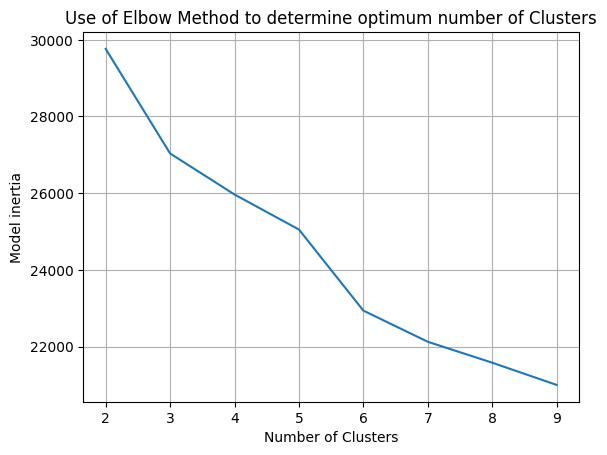

In [ ]:
plt.plot(n_clusters, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Model inertia')
plt.title('Use of Elbow Method to determine optimum number of Clusters')
plt.grid()
plt.show()

In the chart illustrated above we make use of the Elbow Method to determine the optimum number of clusters to be chosen for the job.

In [ ]:
cluster_model = KMeans(init = 'k-means++', n_clusters = 6,random_state = 0)
cluster_model.fit(x_scaled)
final_dataset['Customer_Segment'] = cluster_model.labels_

### Exploratory Data analysis accross customer segments obtained

In [ ]:
customers_segment = final_dataset.groupby('Customer_Segment').agg({'Age':'mean', 'Income': 'mean' , 'MntWines': 'mean', 'MntFruits': 'mean', 'MntMeatProducts': 'mean', 'MntFishProducts': 'mean', 'MntSweetProducts': 'mean', 'MntGoldProds': 'mean','NumDealsPurchases': 'mean', 'NumWebPurchases': 'mean', 'NumCatalogPurchases': 'mean', 'NumStorePurchases': 'mean', 'NumWebVisitsMonth': 'mean'})
customers_segment = customers_segment.reset_index()
customers_segment

,Customer_Segment,Age,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,45.830018,29445.734177,23.815552,6.336347,21.354430,9.515371,6.099458,16.567812,1.990958,2.019892,0.433996,3.007233,6.998192
1,1,52.405405,73880.837838,498.037162,96.540541,426.891892,133.834459,96.266892,94.743243,1.483108,5.381757,5.469595,8.432432,2.942568
2,2,57.188636,55799.915909,467.486364,18.184091,124.331818,23.161364,19.850000,65.804545,4.418182,6.831818,2.813636,7.502273,6.438636
3,3,57.904762,45242.285714,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190,2.333333,3.619048,2.047619,5.238095,5.809524
4,4,57.565789,76973.423684,692.442105,39.210526,417.184211,62.623684,42.355263,59.976316,1.465789,5.231579,6.097368,8.521053,3.142105
5,5,58.844106,43489.996198,81.982890,5.543726,30.980989,7.602662,5.382129,15.017110,2.013308,2.420152,0.878327,3.891635,5.507605


In [ ]:
final_dataset['Education'] = encoder1.inverse_transform(dataset['Education'])
final_dataset['Marital_Status'] = encoder2.inverse_transform(dataset['Marital_Status'])

So from our analysis we can conclude that the customers within our dataset can be broadly categorized into 6 Clusters, Each with thier own unique characteristics & behaviour. The behaviour of each cluster can be breifly described as:
* Cluster 0: Lower age group, lower income , mostly graduates & married with no complaints & poor     chances to accept any marketting campaigns.

* Cluster 1: Median age group , higher income with high product purchases, mostly graduates & married with no complaints and higher likely to decline any marketting campaigns.

* Cluster 2: Median age group , median income, mostly married & graduates with no complaints and a 50-50 liklihood to accept any marketting campaigns.

* Cluster 3: Median age group , lower quartile income category, mostly married & graduates with many complaints & poor chances to accept any marketting campaigns.

* Cluster 4: Median age group  ,higher income category with relatively poor product purchases, mostly married & graduates with no complaints and higher liklihood to accept any marketting campaigns.

* Cluster 5: Upper age group, lower quartile income category, mostly PhD & married with no complaints & poor chances to accept any marketting campaigns.

To understand more in detail we can refer to the table & charts ,above and below this cell respectively which provides us with a more detailed insight about the characteristics of each cluster.

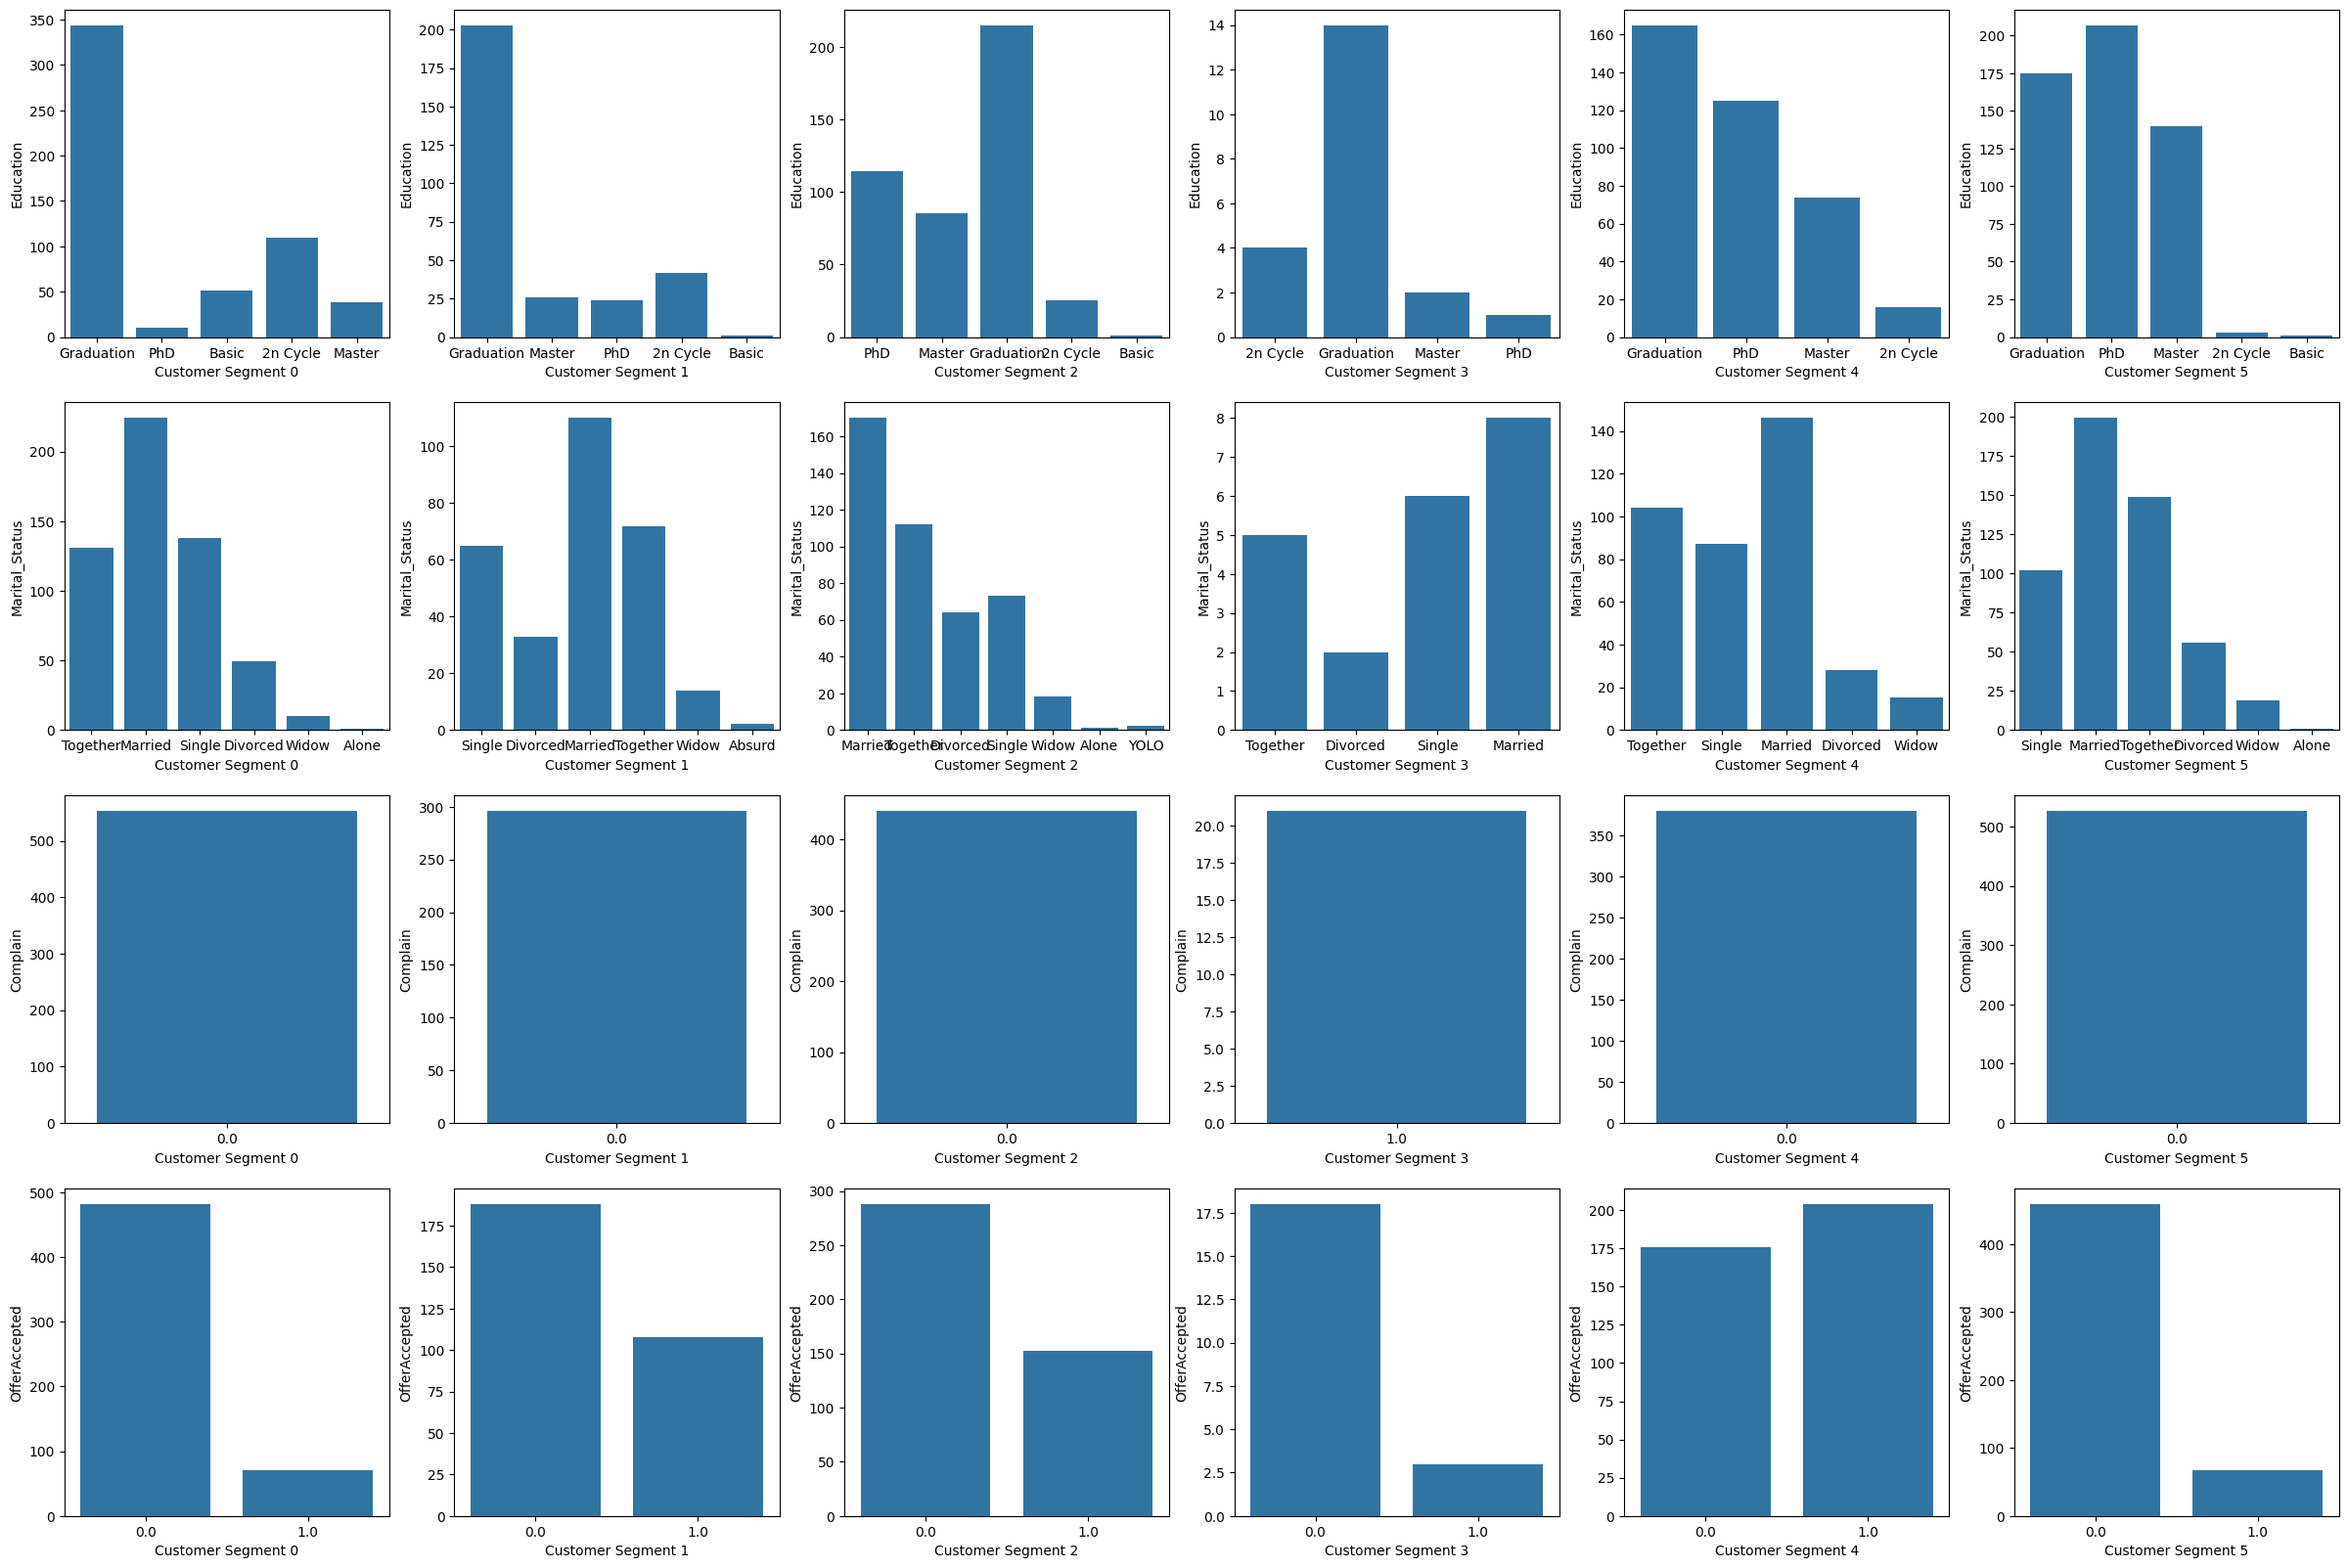

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols =6, figsize = (30,20))
vars = ['Education','Marital_Status','Complain', 'OfferAccepted']
row = 0
for var in vars:
  for i in range(6):
    data = final_dataset.where(final_dataset['Customer_Segment'] ==  i)
    axes[row][i]=sns.countplot(data, x = var,ax = axes[row][i])
    axes[row][i].set_xlabel(f'Customer Segment {i}')
    axes[row][i].set_ylabel(var)
  row+=1
plt.show()

Hence we can finally conclude our exercise with a breif idea about the customer behaviour within our data and also enough information to make our marketting more economical as we now know which cluster of customers to target if we want our product to be purchased.